# Aula 4 (14/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Processamento de imagens coloridas.

---

### Distribuição de intensidade por alongamento

O OpenCV não possui nenhuma função para alongamento de contraste e o Google produz o mesmo resultado porque a equalização do histograma estica o histograma horizontalmente, mas é apenas a diferença da função de transformação. (Ambos os métodos aumentam o contraste das imagens. A função de transformação transfere os níveis de intensidade de pixel do intervalo especificado para o intervalo necessário.)

A equalização do histograma deriva a função de transformação (TF) automaticamente da função de densidade de probabilidade (PDF) da imagem fornecida onde, ao contrário do alongamento de contraste, você especifica seu próprio TF com base nos requisitos dos aplicativos.

Pode-se usar cv2.LUT para ampliação de contraste criando uma tabela personalizada usando np.interp.

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
img1 = cv2.imread('fog-oceano\\fog-001-800x600.jpg')
img2 = cv2.imread('fog-oceano\\fog-002-800x600.jpg')
img3 = cv2.imread('fog-oceano\\fog-04.jpg')
img4 = cv2.imread('fog-oceano\\fog9.jpg')

original1 = img1.copy()
original2 = img2.copy()
original3 = img3.copy()
original4 = img4.copy()


xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')

img1_RGB = cv2.LUT(img1, table)
img2_RGB = cv2.LUT(img2, table)
img3_RGB = cv2.LUT(img3, table)
img4_RGB = cv2.LUT(img4, table)

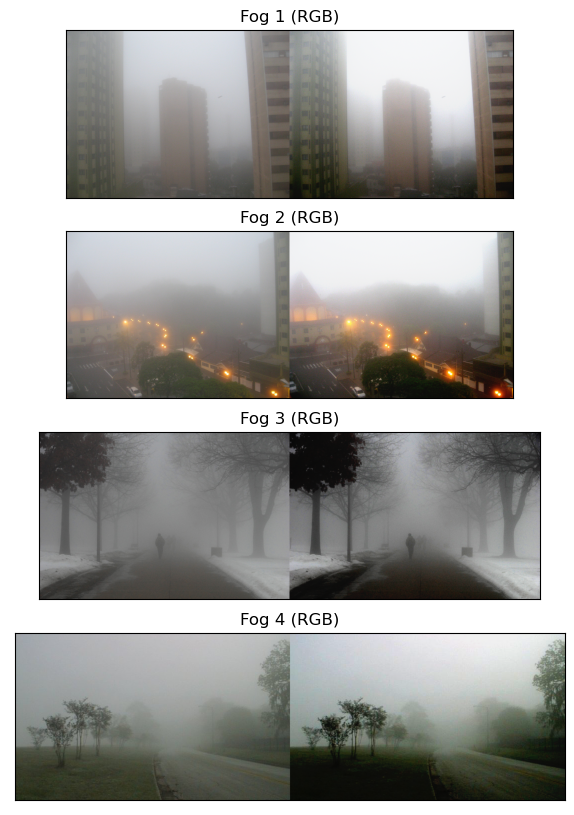

In [42]:
# Plotar todos os resultados

#Colocar imagens oringinais do lado de seus alongamentos
res1 = np.hstack((original1, img1_RGB)) 
res2 = np.hstack((original2, img2_RGB)) 
res3 = np.hstack((original3, img3_RGB)) 
res4 = np.hstack((original4, img4_RGB)) 

titles = ['Fog 1 (RGB)', 'Fog 2 (RGB)', 'Fog 3 (RGB)', 'Fog 4 (RGB)']
images = [res1, res2, res3, res4]
plt.figure(figsize=(10,10))
for i in range(4):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(4,1,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [43]:
img1 = cv2.imread('fog-oceano\\fog-001-800x600.jpg')
img2 = cv2.imread('fog-oceano\\fog-002-800x600.jpg')
img3 = cv2.imread('fog-oceano\\fog-04.jpg')
img4 = cv2.imread('fog-oceano\\fog9.jpg')

img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
img4_hsv = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)

xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')

img1_hsv = cv2.LUT(img1_hsv, table)
img2_hsv = cv2.LUT(img2_hsv, table)
img3_hsv = cv2.LUT(img3_hsv, table)
img4_hsv = cv2.LUT(img4_hsv, table)


# Converter de volta para BGR
img1_HSV = cv2.cvtColor(img1_hsv, cv2.COLOR_HSV2BGR)
img2_HSV = cv2.cvtColor(img2_hsv, cv2.COLOR_HSV2BGR)
img3_HSV = cv2.cvtColor(img3_hsv, cv2.COLOR_HSV2BGR)
img4_HSV = cv2.cvtColor(img4_hsv, cv2.COLOR_HSV2BGR)

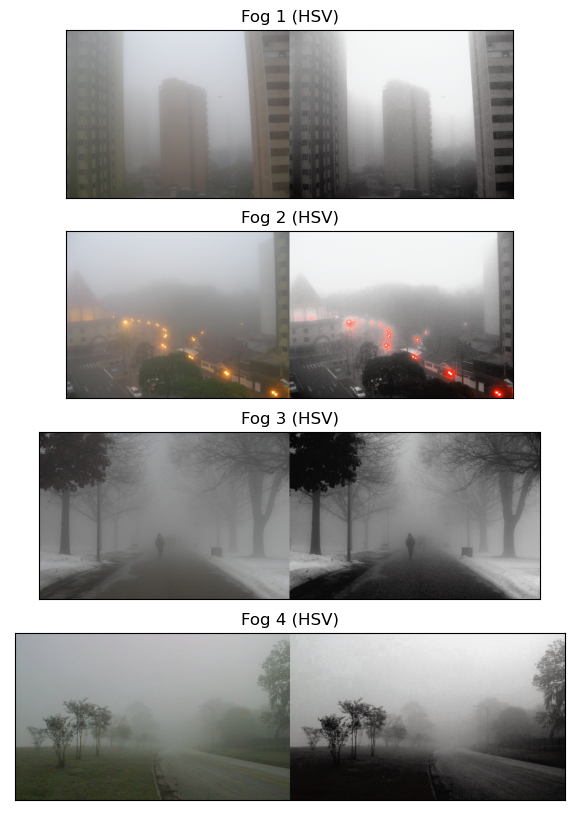

In [44]:
# Plotar todos os resultados

#Colocar imagens oringinais do lado de seus alongamentos
res1 = np.hstack((original1, img1_HSV)) 
res2 = np.hstack((original2, img2_HSV)) 
res3 = np.hstack((original3, img3_HSV)) 
res4 = np.hstack((original4, img4_HSV)) 

titles = ['Fog 1 (HSV)', 'Fog 2 (HSV)', 'Fog 3 (HSV)', 'Fog 4 (HSV)']
images = [res1, res2, res3, res4]
plt.figure(figsize=(10,10))
for i in range(4):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(4,1,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

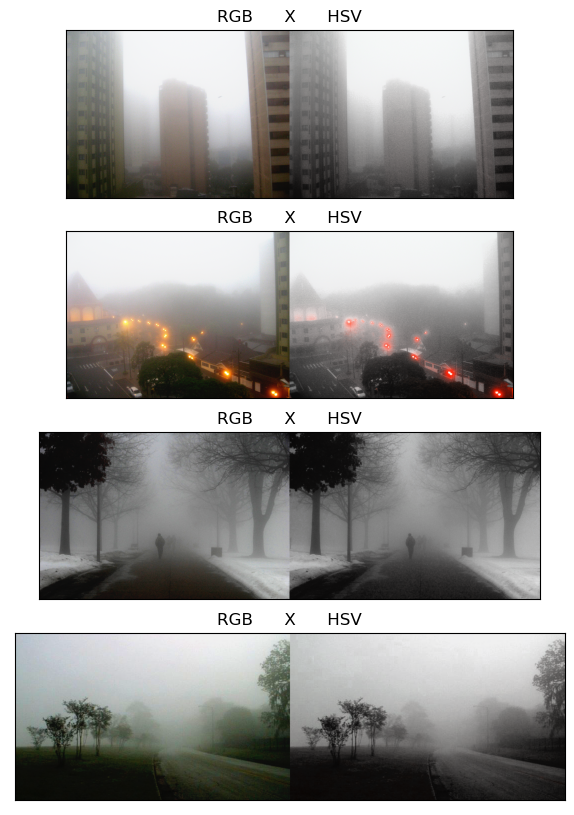

In [45]:
# RGB VS HSV

#Colocar imagens oringinais do lado de seus alongamentos
res1 = np.hstack((img1_RGB, img1_HSV)) 
res2 = np.hstack((img2_RGB, img2_HSV)) 
res3 = np.hstack((img3_RGB, img3_HSV)) 
res4 = np.hstack((img4_RGB, img4_HSV)) 

titles = ['RGB      X      HSV', 'RGB      X      HSV', 'RGB      X      HSV', 'RGB      X      HSV']
images = [res1, res2, res3, res4]
plt.figure(figsize=(10,10))
for i in range(4):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(4,1,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Responda:

- **Qual a diferença entre os resultados da equalização de histogramas considerando os espaços RGB e HSV?**

Os espaços diferentes, RGB e HSV parecem respeitar certos matizes sobre outros. Apesar que ambos mostram resultados similares.

- **Em alguma situação ocorre distorção nas cores das imagens?**

Sim, em ambos os casos ocorre distorção de cores. A mais notável é no espaço HSV, onde as lâmpadas da cidade assumem tons muito avermelhados.

- **O que ocorre quando processamos apenas o componente I da imagem colorida?**

Mudamos a intensidade da imagem, de forma que um I máximo é equivalente a uma luz puramente branca (sol) atingindo o objeto.

- **O que ocorre quando processamos apenas o espaço H ou S de uma imagem?**

As imagem alteram sua matiz e sua saturação. Deslocando nos eixos presentes na imagem abaixo.

![HSI](https://www.researchgate.net/publication/239814963/figure/fig2/AS:298575935361045@1448197458611/HSI-model-representation-The-letters-R-Y-G-C-B-M-refer-to-Red-Yellow-Green.png)